In [36]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns #Need to install
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG
from sklearn.tree import DecisionTreeRegressor as scart
from sklearn.manifold import TSNE
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.svm import SVR

**Loading CSV to dataframes
Production of crop**

In [2]:
crop_prod=pd.read_csv('agri_data_3/sum_prod.csv',delimiter=',')
crop_prod=crop_prod.fillna(0)
# print(crop_prod.dtypes)

In [3]:
crop_prod.sort_values(by=crop_prod.columns[0])
STATENAM = sorted(set(crop_prod.iloc[:,0].values))
crop_prod.head()

,STATENAM,YEAR,QWHEAT,QRICE,QMAIZE,QJOWAR,QBAJRA,QSUGAR,QPOTATO,QGNUT,...,QGRAM,QTUR,QRAGI,QSESAMUM,QRMSEED,QCOTTON,QOPULS,QSOY,QSUNFLWR,QJUTE
0,BIHAR,1956,184.533000,3795.153000,378.284,0.000,0.000,372.916000,291.570,0.000,...,145.682000,48.938,74.265,6.748,12.182000,0.00000,0.000,0.0,0.0,225.40752
1,HARYANA,1956,641.940000,82.846000,103.637,38.711,179.028,253.698000,35.561,5.962,...,1108.206000,27.958,0.000,0.784,56.899000,30.44538,37.391,0.0,0.0,0.00000
2,WEST_BENGAL,1956,27.198261,4801.670153,40.515,0.000,0.000,117.712172,313.612,0.000,...,120.312223,0.000,0.000,0.000,25.046186,0.00000,0.000,0.0,0.0,243.97758
3,MADHYA_PRADESH,1956,1730.200000,3316.400000,188.900,1099.600,91.100,169.800000,337.668,201.100,...,1007.100000,417.363,0.000,67.400,0.000000,101.22000,436.530,0.0,0.0,0.00000
4,KARNATAKA,1956,65.400000,1068.700000,8.400,851.000,112.600,344.550000,0.000,657.050,...,40.970000,181.318,0.000,0.000,0.000000,71.14000,79.560,0.0,0.0,0.00000


In [4]:
crop_price=pd.read_csv("agri_data_3/price_avg.csv",delimiter=',')
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,...,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,...,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,...,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,...,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,...,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,...,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


**Area of cultivation**

In [5]:
area_cult=pd.read_csv("agri_data_3/sum_area.csv",delimiter=',')
# print(sum(area_cult.isna()))
area_cult.head()

,STATENAM,YEAR,AWHEAT,ARICE,AMAIZE,AJOWAR,ABAJRA,ASUGAR,APOTATO,AGNUT,...,AGRAM,ATUR,ARAGI,ASESAMUM,ARMSEED,ACOTTON,AOPULS,ASOY,ASUNFLWR,AJUTE
0,BIHAR,1956,761.655000,4982.91100,612.143,0.00,0.000,162.511000,49.842000,0.000,...,496.049000,128.039,143.704,25.902,57.170000,0.000,0.000,0.0,0.0,249.785
1,HARYANA,1956,540.789000,98.26900,81.466,238.47,791.602,90.217000,2.294000,9.018,...,1346.922000,27.914,0.000,3.172,161.470000,117.813,147.602,0.0,0.0,0.000
2,WEST_BENGAL,1956,84.763967,4445.18468,56.100,0.00,0.000,24.170931,47.924049,0.000,...,194.129557,0.000,0.000,0.000,72.692308,0.000,0.000,0.0,0.0,271.827
3,MADHYA_PRADESH,1956,3240.300000,3889.40000,430.100,1644.70,172.000,52.910000,28.759000,346.080,...,1543.300000,486.501,0.000,321.030,0.000000,767.410,1026.790,0.0,0.0,0.000
4,KARNATAKA,1956,309.800000,942.60000,10.000,2597.40,534.500,54.420000,0.000000,938.500,...,159.150000,401.276,0.000,0.000,0.000000,1183.150,291.170,0.0,0.0,0.000


**Price of the crop**

In [6]:
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,...,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,...,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,...,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,...,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,...,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,...,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


**Average Price of the crop Yearwise**

In [7]:
crop_price_year=pd.read_csv('agri_data_3/price_year.csv',delimiter=',')
crop_price_year=crop_price_year.fillna(0)

In [8]:
crop_price_year.head()


,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,43.187258,41.190087,28.484940,26.356545,27.769277,37.426100,28.402587,39.285801,29.471242,...,35.462950,32.734899,29.450375,67.710816,64.721887,63.907390,31.900534,0.0,0.0,17.741169
1,1957,42.979839,43.562016,30.040616,24.083642,26.280011,39.113553,28.623609,41.796386,26.906162,...,34.193125,31.540664,28.856264,70.519070,64.756141,70.327843,35.020101,0.0,0.0,17.149851
2,1958,48.813222,43.926039,32.844178,26.744115,29.063172,47.341284,28.608965,43.134198,32.809844,...,43.004186,39.672414,31.825891,71.077195,65.799562,74.871588,41.072037,0.0,0.0,16.706689
3,1959,46.862000,44.066294,30.495578,27.666089,28.522844,49.530732,29.562451,46.290822,27.782508,...,38.707483,36.135408,30.530407,69.959613,66.181269,74.052776,39.225863,0.0,0.0,15.250956
4,1960,45.090633,43.425872,31.000470,27.557708,29.708605,43.186069,28.711125,50.377390,27.367883,...,39.547193,36.645273,31.438156,83.893891,76.462328,89.697121,39.581415,0.0,0.0,31.098163


**Visualization of the Crop Price data**

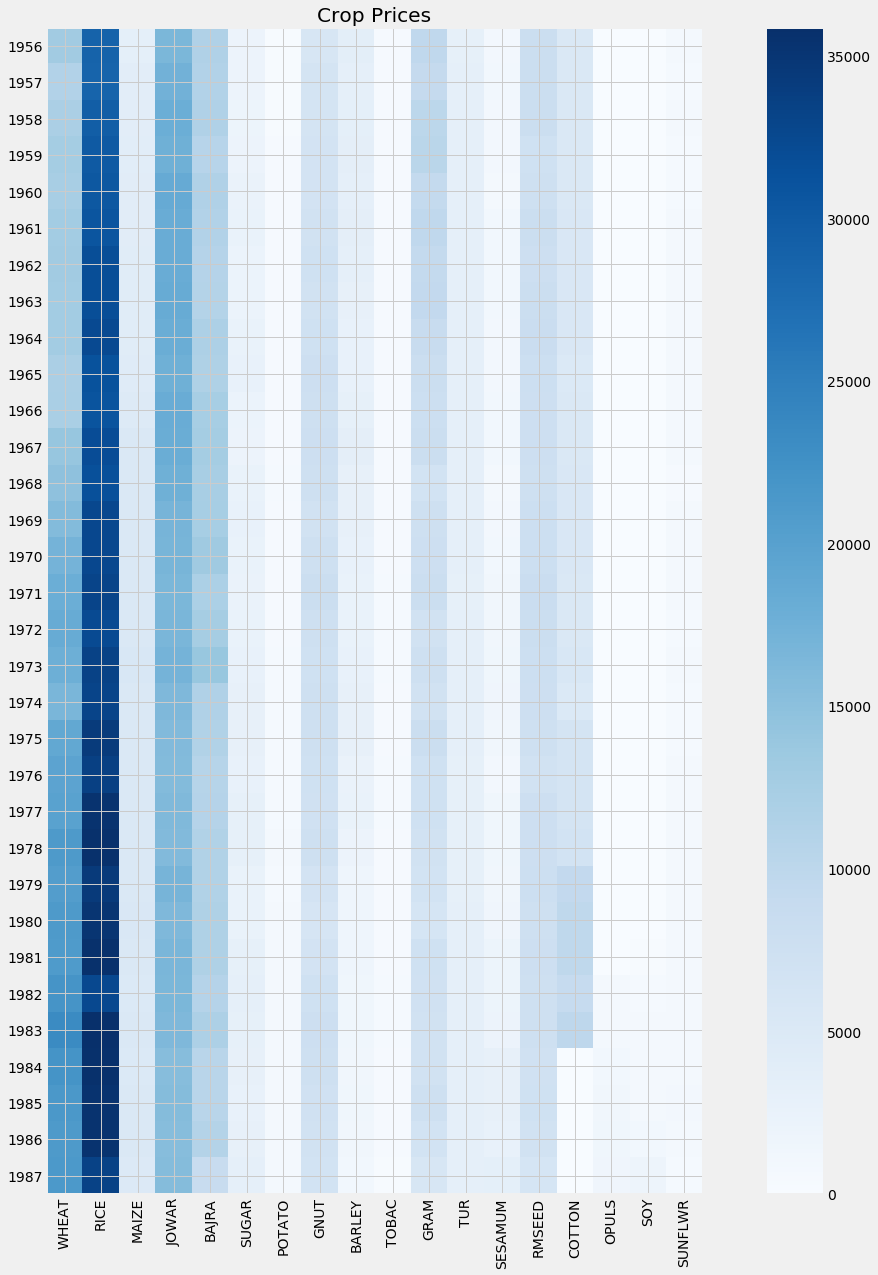

In [165]:
mat1 = np.matrix(crop_price_year.values[:,1:],dtype='float')
# print(mat2.shape)
mat1=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=1,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_price_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_price_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_price_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat1, cmap='Blues')
plt.colorbar()
plt.title('Crop Prices')
plt.show()

**Area under Cultivation Yearly**

In [10]:
area_cult_year=pd.read_csv('agri_data_3/area_year.csv',delimiter=',')
area_cult_year=area_cult_year.fillna(0)


In [11]:
area_cult_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,12951.36897,28783.21868,3352.050,16496.839,11386.333,2021.141931,231.402049,5674.862,3520.938514,...,9655.280557,3064.431,210.719,1643.351,880.358308,7944.251,5086.020,0.0,0.0,580.983
1,1957,11124.86045,28693.36952,3679.540,17247.415,11107.748,2021.018879,258.429187,6414.056,3169.552666,...,9100.404669,3100.436,234.834,1587.144,994.199430,7932.753,5169.518,0.0,0.0,547.372
2,1958,11964.39013,29432.29205,3782.756,17895.009,11357.569,1907.863530,271.796749,6240.430,3343.798489,...,10071.397620,3143.685,263.433,1731.856,966.217271,7866.980,5185.647,0.0,0.0,561.731
3,1959,12724.82640,30077.45306,3881.671,17645.206,10645.070,2078.814530,290.731068,6449.811,3393.273385,...,10336.769820,3140.471,269.401,1657.272,845.306753,7220.447,5203.516,0.0,0.0,497.293
4,1960,12259.01078,30315.49543,3925.277,18411.868,11482.312,2353.335932,291.139436,6449.220,3220.483023,...,9229.449101,3122.379,277.621,1455.727,840.690470,7536.802,5155.862,0.0,0.0,489.865


**Visualization of the Area under cultivation data**

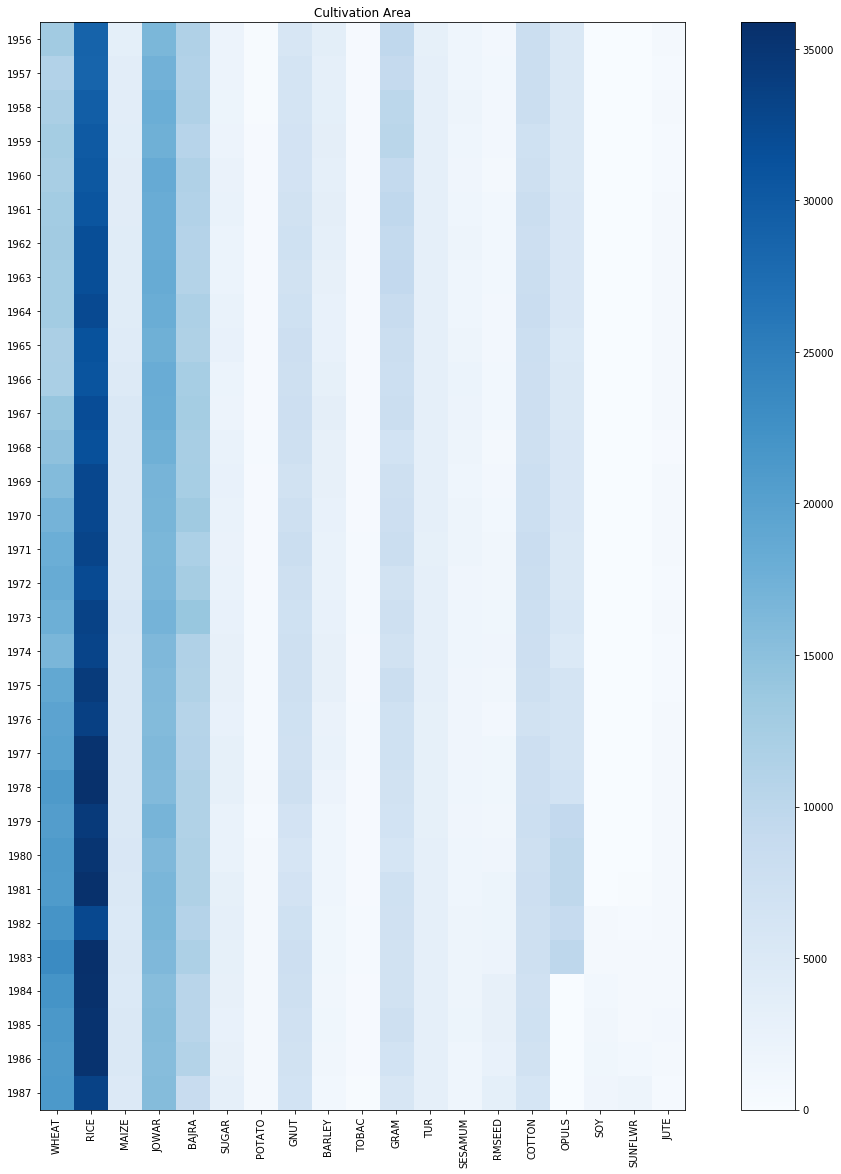

In [12]:
mat2 = np.matrix(area_cult_year.values[:,1:],dtype='float')
# print(mat2.shape)
mat2=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=2,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(area_cult_year.columns[1:],12))))
ax.set_yticks(np.arange(len(area_cult_year.iloc[:,0])))
ax.set_xticklabels(np.delete(area_cult_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat2, cmap='Blues')
plt.colorbar()
plt.title('Cultivation Area')
plt.show()

**Production of the crop**

In [14]:
crop_prod_year=pd.read_csv('agri_data_3/prod_year.csv',delimiter=',')
crop_prod_year=crop_prod_year.fillna(0)

In [15]:
crop_prod_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,8994.794262,25509.26915,2710.378,7631.323,2886.312,7013.055172,1672.284000,4566.565,2973.464745,...,6212.494223,2277.251,101.561,335.712,355.080186,816.32676,1990.496,0.0,0.0,530.96454
1,1957,7343.911870,21604.97523,2802.579,8597.357,3616.600,6901.704800,1875.045115,4673.989,2456.824085,...,4913.056160,2310.780,103.601,263.962,368.882894,818.12932,1925.913,0.0,0.0,504.95670
2,1958,9413.368621,27008.66144,2992.087,8984.954,3838.561,7096.408200,2150.681824,5144.230,2780.001367,...,7018.333270,2357.383,127.347,387.458,380.403559,822.39198,2739.836,0.0,0.0,700.33716
3,1959,9789.582790,27687.38011,3602.979,8516.071,3465.496,7670.902600,2516.961578,4529.749,2799.343293,...,5621.398290,2337.247,153.424,271.376,291.225574,611.17560,2661.684,0.0,0.0,556.20468
4,1960,10528.610090,30394.82344,3594.961,9834.699,3254.185,10798.259200,2462.428590,4727.999,2905.219627,...,6284.399685,2336.095,133.415,186.139,364.405310,926.04960,2673.806,0.0,0.0,565.71696


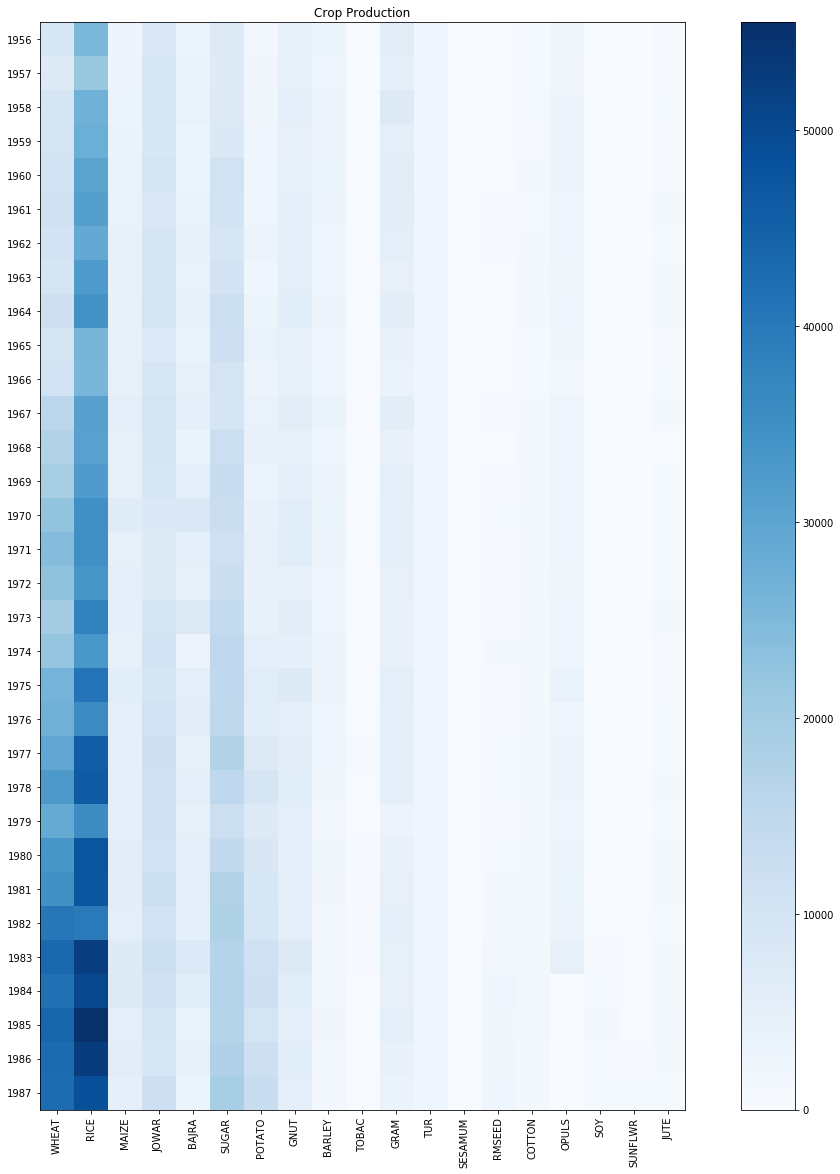

In [16]:
mat3 = np.matrix(crop_prod_year.values[:,1:],dtype='float')
# print(mat3.shape)
mat3=np.delete(mat3,12,1)
# print(mat3.shape)
fig = plt.figure(num=3,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_prod_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_prod_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_prod_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(crop_prod_year.iloc[:,0])
plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.title('Crop Production')
plt.show()

In [17]:
crop_yield_year=pd.read_csv('agri_data_3/yield_year.csv',delimiter=',')
crop_yield_year=crop_yield_year.fillna(0)
crop_yield_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,...,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,142.139663,218.379154,154.830737,96.688463,74.567994,932.039639,1277.152929,218.874660,141.521991,...,129.680089,184.054121,13.587052,53.543472,55.100672,19.275587,85.766453,0.0,0.0,83.337570
1,1957,139.862257,194.720165,142.682246,113.721145,82.210835,946.250554,1246.345073,217.885092,139.974844,...,110.575844,184.840416,11.859708,50.255022,55.880623,18.768086,80.682155,0.0,0.0,73.241272
2,1958,165.875684,230.494105,167.739962,123.213744,88.798229,976.526417,1320.211813,242.891415,149.543476,...,137.875324,185.804497,13.132560,59.552844,67.812583,18.392946,110.787131,0.0,0.0,83.143390
3,1959,162.037833,229.635559,168.982956,117.295837,85.409247,979.687464,1325.044479,250.922041,142.864689,...,122.222772,183.805294,14.488696,48.317224,46.815507,17.765593,106.054610,0.0,0.0,82.817122
4,1960,177.034342,232.637265,176.061540,117.248091,86.372075,1089.761573,1342.382784,189.897089,154.604827,...,134.372115,185.009440,12.806572,43.608872,51.638454,23.710441,108.738404,0.0,0.0,82.321341


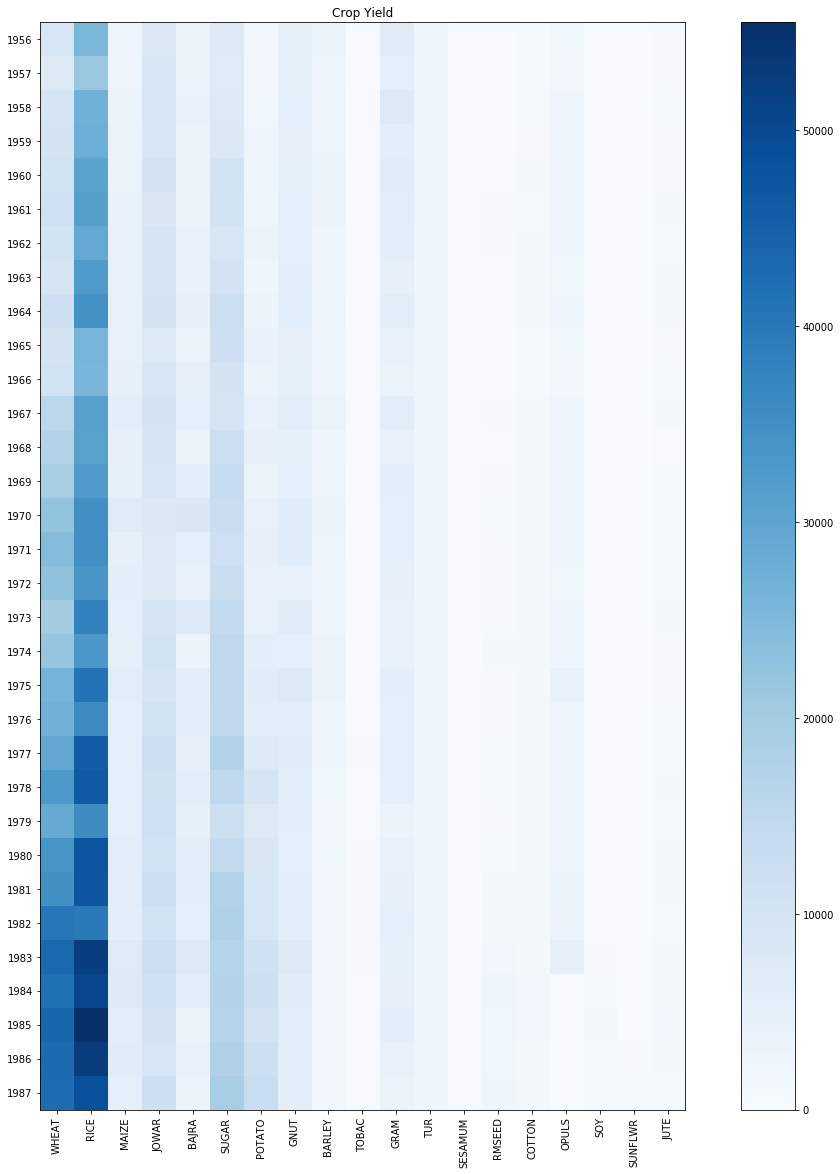

In [19]:
mat4 = np.matrix(crop_prod_year.values[:,1:],dtype='float')
# print(mat3.shape)
mat4=np.delete(mat4,12,1)
# print(mat3.shape)
fig = plt.figure(num=4,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_yield_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_yield_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_yield_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(crop_yield_year.iloc[:,0])
plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.title('Crop Yield')
plt.show()

**Annual Rainfall**

In [18]:
rainfall =  pd.read_csv('agri_data_3/rainfall_no_missing.csv',delimiter=',')
rainfall.head()

,State,YEAR,RNJAN,RNFEB,RNMAR,RNAPR,RNMAY,RNJUN,RNJUL,RNAUG,RNSEP,RNOCT,RNNOV,RNDEC,Annual
0,PUNJAB,1956,21.60,6.80,45.30,5.10,0.70,53.5,236.50,28.70,26.70,14.10,0.20,5.30,444.50
1,BIHAR,1956,19.20,4.60,9.60,5.30,74.90,319.0,2.70,286.40,36.00,169.00,35.90,8.20,970.80
2,HARYANA,1956,16.80,3.00,24.80,0.80,2.20,5.7,23.30,161.60,21.50,132.40,4.80,0.60,397.50
3,MADHYA_PRADESH,1956,8.00,3.15,5.05,1.05,37.50,150.0,468.35,325.35,156.35,84.55,33.25,13.75,1286.35
4,WEST_BENGAL,1956,9.65,17.65,24.15,95.25,92.25,545.6,362.65,391.10,338.15,186.70,7.90,3.75,2074.80


In [19]:
rainfall1=rainfall.copy()
rainfall1 = rainfall1.groupby(['State','YEAR'],as_index=True).mean()


In [20]:
rainfall1.head()

RNJAN     RNFEB      RNMAR      RNAPR      RNMAY  \
State          YEAR                                                        
ANDHRA_PRADESH 1956  3.233333  1.900000   4.452492  32.266667  42.233333   
               1957  4.074852  2.366667  14.100000  15.566667  31.766667   
               1958  3.333333  4.333333   6.566667  22.666667  33.200000   
               1959  1.766667  6.766667   7.971650  14.533333  10.666667   
               1960  0.766667  7.517040  17.733333   4.433333  30.366667   

                          RNJUN       RNJUL       RNAUG       RNSEP  \
State          YEAR                                                   
ANDHRA_PRADESH 1956   95.566667  147.366667  118.333333  170.000000   
               1957  104.000000   15.200000  202.433333   81.600000   
               1958   28.033333  207.566667  237.500000  110.833333   
               1959  109.566667  217.300000   98.666667  147.200000   
               1960  104.200000  142.966667   57.300000  242.600000   

                          RNOCT       RNNOV      RNDEC      Annual  
State          YEAR                                                 
ANDHRA_PRADESH 1956  191.033333   85.000000  21.233333  912.619158  
               1957   89.466667   56.111050   4.666352  621.352254  
               1958  159.833333   91.866667  11.566352  917.299686  
               1959  110.366667   14.066667   6.433333  745.304983  
               1960   24.233333  103.766667   7.966667  743.850373

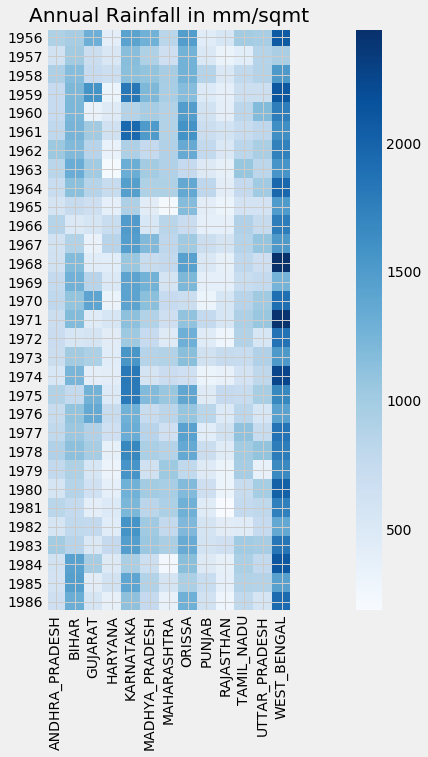

In [163]:
mat5 = np.matrix(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])))
ax.set_xticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0])))
ax.set_yticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])
ax.set_xticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0],rotation='vertical')
plt.imshow(mat5, cmap='Blues')
plt.colorbar()
plt.title('Annual Rainfall in mm/sqmt')
plt.show()

In [22]:
price=crop_price_year.transpose()
price.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
YEAR,1956.000000,1957.000000,1958.000000,1959.000000,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,1978.000000,1979.000000,1980.000000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000
WHEAT,43.187258,42.979839,48.813222,46.862000,45.090633,46.742005,47.420532,57.210559,70.005913,87.460120,...,134.060697,149.230603,176.943972,185.619414,211.000164,195.560545,182.584921,203.533868,212.144970,215.174556
RICE,41.190087,43.562016,43.926039,44.066294,43.425872,44.147218,49.547925,56.937961,68.734669,87.185401,...,140.295255,142.689989,153.199296,168.825363,191.570996,207.124072,178.561991,193.439612,200.422899,228.521716
MAIZE,28.484940,30.040616,32.844178,30.495578,31.000470,30.426459,31.551339,35.089808,50.369200,60.508726,...,99.086459,111.593353,121.604203,136.507035,148.391233,149.120853,142.639323,167.793713,179.183432,184.292899
JOWAR,26.356545,24.083642,26.744115,27.666089,27.557708,28.333015,29.113625,34.083852,44.804735,49.987318,...,85.010203,90.841008,108.343647,117.330879,124.293654,130.322686,134.098402,145.943373,149.399408,153.585799


In [37]:
price.to_csv(r'price.csv')

In [38]:
crop_prod2= crop_prod.melt(id_vars=["STATENAM","YEAR"],var_name="CROP",value_name="PROD")
crop_prod2.head()

,STATENAM,YEAR,CROP,PROD
0,BIHAR,1956,QWHEAT,184.533000
1,HARYANA,1956,QWHEAT,641.940000
2,WEST_BENGAL,1956,QWHEAT,27.198261
3,MADHYA_PRADESH,1956,QWHEAT,1730.200000
4,KARNATAKA,1956,QWHEAT,65.400000


In [39]:
crop_prod2.to_csv(r'new_prod.csv')

In [40]:
area_cult2= area_cult.melt(id_vars=["STATENAM","YEAR"],var_name="CROP",value_name="AREA")
area_cult2.head()

,STATENAM,YEAR,CROP,AREA
0,BIHAR,1956,AWHEAT,761.655000
1,HARYANA,1956,AWHEAT,540.789000
2,WEST_BENGAL,1956,AWHEAT,84.763967
3,MADHYA_PRADESH,1956,AWHEAT,3240.300000
4,KARNATAKA,1956,AWHEAT,309.800000


In [41]:
area_cult2.to_csv(r'new_area.csv')

In [42]:
crop_yield=pd.read_csv('agri_data_3/sum_yield.csv',delimiter=',')
crop_yield=crop_yield.fillna(0)
# print(crop_prod.dtypes)

In [43]:
crop_yield2= area_cult.melt(id_vars=["STATENAM","YEAR"],var_name="CROP",value_name="YIELD")
crop_yield2.head()

,STATENAM,YEAR,CROP,YIELD
0,BIHAR,1956,AWHEAT,761.655000
1,HARYANA,1956,AWHEAT,540.789000
2,WEST_BENGAL,1956,AWHEAT,84.763967
3,MADHYA_PRADESH,1956,AWHEAT,3240.300000
4,KARNATAKA,1956,AWHEAT,309.800000


In [44]:
crop_yield2.to_csv(r'new_yield.csv')

In [45]:
data = pd.read_csv('data_set.csv')
print(data.shape)
data.head()

(8321, 9)


,STATENAM,YEAR,CROP,AREA,PRICE,PROD,YIELD,ANN_RAIN,AVG_TEMP
0,ANDHRA_PRADESH,1956.0,BAJRA,605.3,25.794737,296.6,605.3,912.619158,27.219919
1,ANDHRA_PRADESH,1957.0,BAJRA,587.7,30.521053,324.6,587.7,621.352254,27.219919
2,ANDHRA_PRADESH,1958.0,BAJRA,650.5,32.721053,345.4,650.5,917.299686,27.219919
3,ANDHRA_PRADESH,1959.0,BAJRA,630.1,33.978947,315.1,630.1,745.304983,27.219919
4,ANDHRA_PRADESH,1960.0,BAJRA,616.4,36.400000,296.3,616.4,743.850373,27.219919


In [46]:
vals = data.corr()
vals

,YEAR,AREA,PRICE,PROD,YIELD,ANN_RAIN,AVG_TEMP
YEAR,1.000000e+00,0.017297,0.510137,0.096909,0.017297,-0.049956,1.191578e-19
AREA,1.729740e-02,1.000000,-0.032887,0.790434,1.000000,-0.030226,3.708375e-02
PRICE,5.101370e-01,-0.032887,1.000000,-0.033362,-0.032887,-0.049312,4.810605e-02
PROD,9.690864e-02,0.790434,-0.033362,1.000000,0.790434,-0.003255,-5.404658e-02
YIELD,1.729740e-02,1.000000,-0.032887,0.790434,1.000000,-0.030226,3.708375e-02
ANN_RAIN,-4.995619e-02,-0.030226,-0.049312,-0.003255,-0.030226,1.000000,2.317707e-01
AVG_TEMP,1.191578e-19,0.037084,0.048106,-0.054047,0.037084,0.231771,1.000000e+00


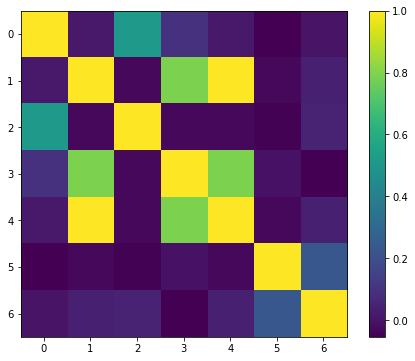

<Figure size 432x288 with 0 Axes>

In [47]:
fig=mplot.figure(figsize=(8,6))
mplot.imshow(vals.values)
mplot.colorbar()
mplot.show()
mplot.savefig('corr.png')

In [48]:
data_num = pd.read_csv('data_set.csv')
print(data_num.shape)
data_num.head()

(8321, 9)


,STATENAM,YEAR,CROP,AREA,PRICE,PROD,YIELD,ANN_RAIN,AVG_TEMP
0,ANDHRA_PRADESH,1956.0,BAJRA,605.3,25.794737,296.6,605.3,912.619158,27.219919
1,ANDHRA_PRADESH,1957.0,BAJRA,587.7,30.521053,324.6,587.7,621.352254,27.219919
2,ANDHRA_PRADESH,1958.0,BAJRA,650.5,32.721053,345.4,650.5,917.299686,27.219919
3,ANDHRA_PRADESH,1959.0,BAJRA,630.1,33.978947,315.1,630.1,745.304983,27.219919
4,ANDHRA_PRADESH,1960.0,BAJRA,616.4,36.400000,296.3,616.4,743.850373,27.219919


In [50]:
data_num = data.fillna(0).groupby(['CROP','YEAR']).agg('mean').reset_index()
dicts = {}
for crop in data_num['CROP'].unique():
    
    X = data_num[data_num['CROP'] == crop]['YEAR'].values.reshape(-1,1)
    Y = data_num[data_num['CROP'] == crop]['PROD'].values
    if(X.shape[0] > 5):
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        dicts[crop] = [w]
#         print(w)

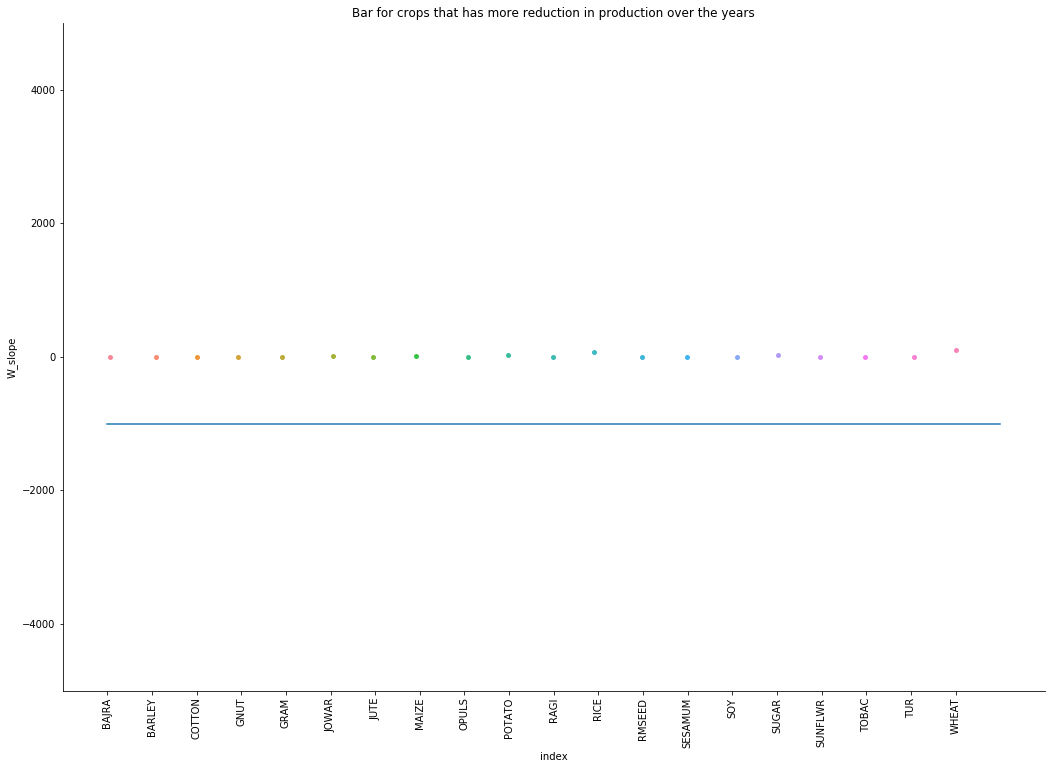

In [51]:
slope_data = pd.DataFrame(dicts).T.reset_index().rename(columns = {0:'W_slope'})
sns.catplot(x='index', y='W_slope', data = slope_data,  height=10, aspect=12/8.27);
plt.ylim(-5000,5000)
plt.xticks(rotation='vertical')
plt.plot([0,slope_data.shape[0]],[-1000,-1000])
plt.title('Bar for crops that has more reduction in production over the years')
# plt.savefig('Figures/Crops_reduction')
plt.show()

In [52]:
slope_data[slope_data.W_slope<-1000]

,index,W_slope


In [53]:

#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# initializing our inputs and outputs
Y = data_num['ANN_RAIN'].values
X = data_num['YIELD'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)
# output : 0.26

0.003196987799702796 868.2004381156414


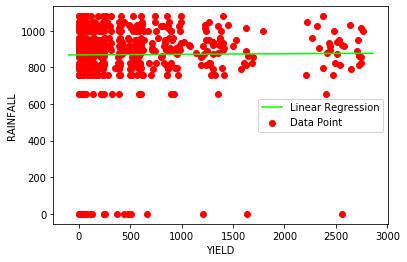

In [55]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('YIELD')
#y-axis label
plt.ylabel('RAINFALL')
plt.legend()
plt.show()

In [56]:
import pandas as pd
import numpy as np
rf_data = pd.read_csv('agri_data/rainfall_no_missing.csv',delimiter=',')

In [57]:
rf_data

,State,YEAR,RNJAN,RNFEB,RNMAR,RNAPR,RNMAY,RNJUN,RNJUL,RNAUG,RNSEP,RNOCT,RNNOV,RNDEC
0,PUNJAB,1956,21.600000,6.800000,45.300000,5.100000,0.700000,53.500000,236.500000,28.700000,26.700000,14.100000,0.200000,5.300000
1,BIHAR,1956,19.200000,4.600000,9.600000,5.300000,74.900000,319.000000,2.700000,286.400000,36.000000,169.000000,35.900000,8.200000
2,HARYANA,1956,16.800000,3.000000,24.800000,0.800000,2.200000,5.700000,23.300000,161.600000,21.500000,132.400000,4.800000,0.600000
3,MADHYA_PRADESH,1956,8.000000,3.150000,5.050000,1.050000,37.500000,150.000000,468.350000,325.350000,156.350000,84.550000,33.250000,13.750000
4,WEST_BENGAL,1956,9.650000,17.650000,24.150000,95.250000,92.250000,545.600000,362.650000,391.100000,338.150000,186.700000,7.900000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,TAMIL_NADU,1986,65.500000,39.000000,16.100000,2.900000,62.700000,63.400000,66.900000,115.200000,142.300000,17.500000,133.400000,57.100000
399,KARNATAKA,1986,8.966667,5.666667,3.333333,18.833333,31.533333,376.433333,316.233333,81.966667,156.133333,16.900000,89.966667,5.400000
400,GUJARAT,1986,10.624555,11.225560,0.100000,19.417468,2.000000,183.100000,159.400000,148.700000,5.800000,1.900000,1.000000,13.599057
401,ORISSA,1986,25.800000,35.800000,12.600000,41.900000,74.500000,291.700000,348.700000,31.800000,183.000000,134.900000,92.200000,17.000000


In [58]:
rf_data.shape

(403, 14)

In [78]:

rf_data2 = rf_data.melt(id_vars=["State", "YEAR"], var_name="Month", value_name="Rainfall")
rf_data2

,State,YEAR,Month,Rainfall
0,PUNJAB,1956,RNJAN,21.600000
1,BIHAR,1956,RNJAN,19.200000
2,HARYANA,1956,RNJAN,16.800000
3,MADHYA_PRADESH,1956,RNJAN,8.000000
4,WEST_BENGAL,1956,RNJAN,9.650000
...,...,...,...,...
4831,TAMIL_NADU,1986,RNDEC,57.100000
4832,KARNATAKA,1986,RNDEC,5.400000
4833,GUJARAT,1986,RNDEC,13.599057
4834,ORISSA,1986,RNDEC,17.000000


In [79]:
rf_data2 = rf_data2.replace('RNJAN', '01')
rf_data2 = rf_data2.replace('RNFEB', '02')
rf_data2 = rf_data2.replace('RNMAR', '03')
rf_data2 = rf_data2.replace('RNAPR', '04')
rf_data2 = rf_data2.replace('RNMAY', '05')
rf_data2 = rf_data2.replace('RNJUN', '06')
rf_data2 = rf_data2.replace('RNJUL', '07')
rf_data2 = rf_data2.replace('RNAUG', '08')
rf_data2 = rf_data2.replace('RNSEP', '09')
rf_data2 = rf_data2.replace('RNOCT', '10')
rf_data2 = rf_data2.replace('RNNOV', '11')
rf_data2 = rf_data2.replace('RNDEC', '12')

In [80]:
rf_data2

,State,YEAR,Month,Rainfall
0,PUNJAB,1956,01,21.600000
1,BIHAR,1956,01,19.200000
2,HARYANA,1956,01,16.800000
3,MADHYA_PRADESH,1956,01,8.000000
4,WEST_BENGAL,1956,01,9.650000
...,...,...,...,...
4831,TAMIL_NADU,1986,12,57.100000
4832,KARNATAKA,1986,12,5.400000
4833,GUJARAT,1986,12,13.599057
4834,ORISSA,1986,12,17.000000


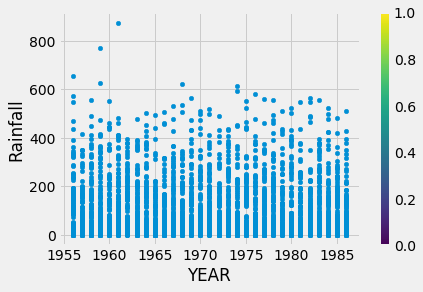

In [167]:
###########
rf_data2.plot.scatter(x="YEAR", y="Rainfall", cmap="rainbow")

In [82]:
rf_data2.head()

,State,YEAR,Month,Rainfall
0,PUNJAB,1956,01,21.60
1,BIHAR,1956,01,19.20
2,HARYANA,1956,01,16.80
3,MADHYA_PRADESH,1956,01,8.00
4,WEST_BENGAL,1956,01,9.65


In [83]:
features = pd.get_dummies(rf_data2)

In [84]:
features

,YEAR,Rainfall,State_ANDHRA_PRADESH,State_BIHAR,State_GUJARAT,State_HARYANA,State_KARNATAKA,State_MADHYA_PRADESH,State_MAHARASHTRA,State_ORISSA,...,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
0,1956,21.600000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1956,19.200000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1956,16.800000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1956,8.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1956,9.650000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,1986,57.100000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4832,1986,5.400000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4833,1986,13.599057,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4834,1986,17.000000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [85]:
labels = np.array(features['Rainfall'])
features = features.drop('Rainfall', axis=1)
feature_list = list(features.columns)
features = np.array(features)

In [86]:
features

array([[1956,    0,    0, ...,    0,    0,    0],
       [1956,    0,    1, ...,    0,    0,    0],
       [1956,    0,    0, ...,    0,    0,    0],
       ...,
       [1986,    0,    0, ...,    0,    0,    1],
       [1986,    0,    0, ...,    0,    0,    1],
       [1986,    1,    0, ...,    0,    0,    1]])

In [87]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)

In [88]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3627, 26)
Training Labels Shape: (3627,)
Testing Features Shape: (1209, 26)
Testing Labels Shape: (1209,)


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [90]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 40.47 degrees.


In [92]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -346.94 %.


In [93]:
predictions.size

1209

In [94]:
rf_data2.head()

,State,YEAR,Month,Rainfall
0,PUNJAB,1956,01,21.60
1,BIHAR,1956,01,19.20
2,HARYANA,1956,01,16.80
3,MADHYA_PRADESH,1956,01,8.00
4,WEST_BENGAL,1956,01,9.65


In [95]:
rf_data2

,State,YEAR,Month,Rainfall
0,PUNJAB,1956,01,21.600000
1,BIHAR,1956,01,19.200000
2,HARYANA,1956,01,16.800000
3,MADHYA_PRADESH,1956,01,8.000000
4,WEST_BENGAL,1956,01,9.650000
...,...,...,...,...
4831,TAMIL_NADU,1986,12,57.100000
4832,KARNATAKA,1986,12,5.400000
4833,GUJARAT,1986,12,13.599057
4834,ORISSA,1986,12,17.000000


In [96]:
rf_data2["Date"] = rf_data2["YEAR"].map(str) + rf_data2["Month"].map(str)


In [97]:
rf_data2["Rainfall"] = rf_data2["Rainfall"].astype(float)
rf_data2

,State,YEAR,Month,Rainfall,Date
0,PUNJAB,1956,01,21.600000,195601
1,BIHAR,1956,01,19.200000,195601
2,HARYANA,1956,01,16.800000,195601
3,MADHYA_PRADESH,1956,01,8.000000,195601
4,WEST_BENGAL,1956,01,9.650000,195601
...,...,...,...,...,...
4831,TAMIL_NADU,1986,12,57.100000,198612
4832,KARNATAKA,1986,12,5.400000,198612
4833,GUJARAT,1986,12,13.599057,198612
4834,ORISSA,1986,12,17.000000,198612


In [98]:
andhra = rf_data2[rf_data2.State == "ANDHRA_PRADESH"]

In [99]:
andhra1 = rf_data2[rf_data2.State == "ANDHRA_PRADESH"][rf_data2.YEAR == 1956]

In [100]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [101]:
pd.to_datetime('195601', format='%Y%m', errors='ignore')

Timestamp('1956-01-01 00:00:00')

In [102]:
r1 = andhra.iloc[:, lambda andhra: [3,4]]

In [103]:
r1["Rainfall"] = r1["Rainfall"].map(float)

In [104]:
andhra['Date'] = pd.to_datetime(andhra['Date'],format='%Y%m', errors='ignore' )

In [105]:
andhra["Date"]

11     1956-01-01
20     1957-01-01
30     1958-01-01
47     1959-01-01
60     1960-01-01
          ...    
4777   1982-12-01
4795   1983-12-01
4803   1984-12-01
4822   1985-12-01
4835   1986-12-01
Name: Date, Length: 372, dtype: datetime64[ns]

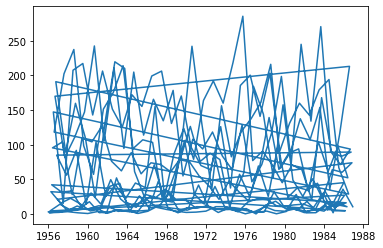

In [106]:
plt.plot(andhra["Date"], andhra["Rainfall"])

In [107]:
date = andhra1["Date"]
rainfall = andhra1["Rainfall"]

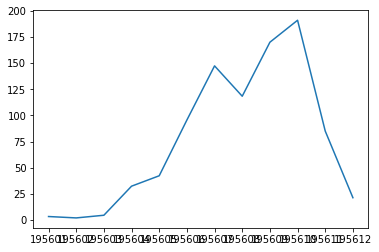

In [108]:
plt.plot(andhra1["Date"], andhra1["Rainfall"])

In [109]:
type(rainfall)

pandas.core.series.Series

In [110]:
andhra2 = date.to_frame().join(rainfall.to_frame())

In [111]:
andhra2

,Date,Rainfall
11,195601,3.233333
414,195602,1.900000
817,195603,4.452492
1220,195604,32.266667
1623,195605,42.233333
2026,195606,95.566667
2429,195607,147.366667
2832,195608,118.333333
3235,195609,170.000000
3638,195610,191.033333


In [112]:
import numpy as np
n1 = andhra2.to_numpy()

In [113]:
from statsmodels.tsa.arima_model import ARIMA

In [115]:
model = ARIMA(n1, order=(5,1,0))

ValueError: endog must be 1-d or 2-d with 1 column

In [116]:
new_a = andhra[['Date', 'Rainfall'] ]

In [117]:
new_a

,Date,Rainfall
11,1956-01-01,3.233333
20,1957-01-01,4.074852
30,1958-01-01,3.333333
47,1959-01-01,1.766667
60,1960-01-01,0.766667
...,...,...
4777,1982-12-01,9.099371
4795,1983-12-01,30.266667
4803,1984-12-01,1.866667
4822,1985-12-01,35.866667


In [118]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

new_a.dtypes

Date        datetime64[ns]
Rainfall           float64
dtype: object

In [120]:
new_a.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10e72e0e0> (for post_execute):


ValueError: view limit minimum -36266.87499999965 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36266.87499999965 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [121]:
new_a.set_index('Date', inplace=True)

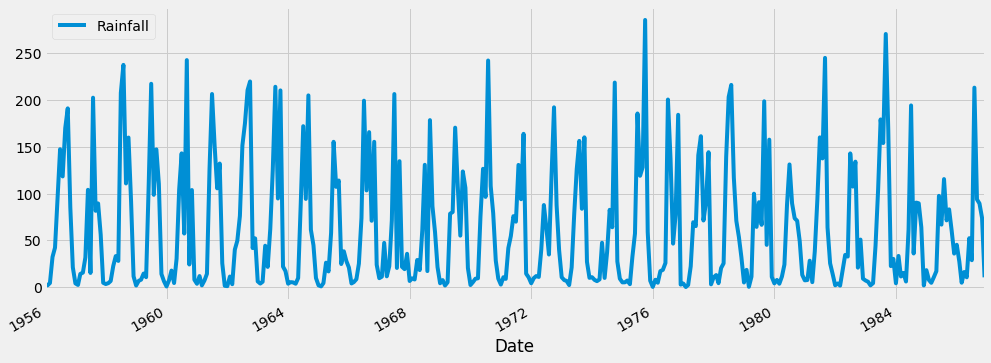

In [122]:
new_a.plot(figsize=(15,6))

In [123]:
new_a2 = new_a

In [124]:
new_a2

,Rainfall
Date,
1956-01-01,3.233333
1957-01-01,4.074852
1958-01-01,3.333333
1959-01-01,1.766667
1960-01-01,0.766667
...,...
1982-12-01,9.099371
1983-12-01,30.266667
1984-12-01,1.866667


In [125]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [126]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_a2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [127]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(new_a2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1400      0.049      2.884      0.004       0.045       0.235
ma.L1         -0.8868      0.027    -33.356      0.000      -0.939      -0.835
ar.S.L12       0.0016      0.047      0.034      0.973      -0.091       0.094
ma.S.L12      -0.9349      0.040    -23.143      0.000      -1.014      -0.856
sigma2      1918.5184    131.248     14.617      0.000    1661.276    2175.761


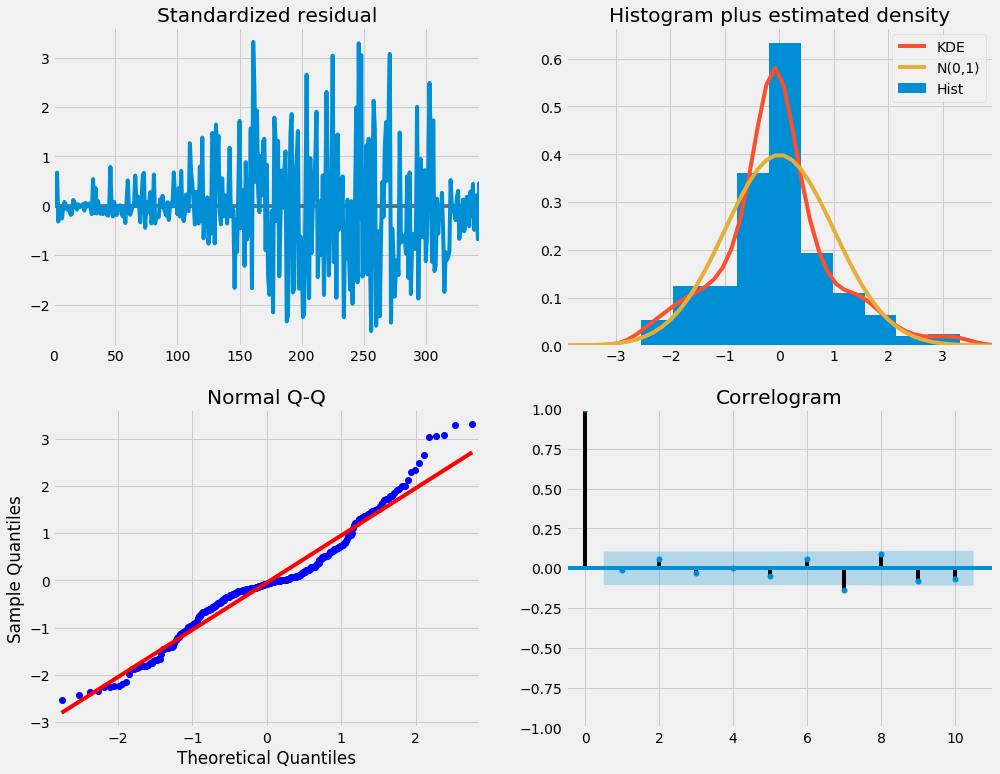

In [128]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [129]:
pred = results.get_prediction(start=pd.to_datetime('1976-01-01'), dynamic=False)
pred_ci = pred.conf_int()

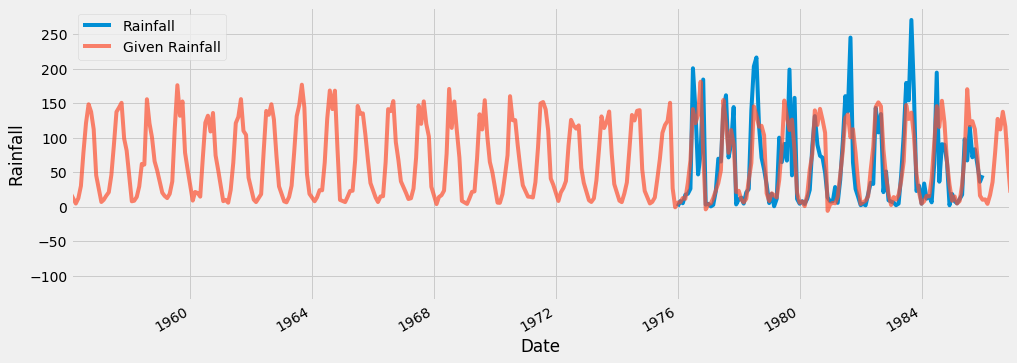

In [130]:
ax = new_a2['1976-01-01':'1986-01-01'].plot(label='observed', figsize=(15,6))
pred.predicted_mean.plot(ax=ax, label='Given Rainfall', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha = 0)

ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()

plt.show()

In [131]:
#y_forecasted = pred.predicted_mean
#y_truth = new_a2['1976':]

# Compute the mean square error
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1956-02-01 00:00:00   NaN
1956-03-01 00:00:00   NaN
1956-04-01 00:00:00   NaN
1956-05-01 00:00:00   NaN
1956-06-01 00:00:00   NaN
                       ..
1986-09-01 00:00:00   NaN
1986-10-01 00:00:00   NaN
1986-11-01 00:00:00   NaN
1986-12-01 00:00:00   NaN
Rainfall              NaN
Length: 353, dtype: float64


In [55]:
new_a2[new_a2Date =='1976-01-01']

NameError: name 'new_a2' is not defined

,Rainfall
Date,
1956-01-01,3.233333
1957-01-01,4.074852
1958-01-01,3.333333
1959-01-01,1.766667
1960-01-01,0.766667
...,...
1982-12-01,9.099371
1983-12-01,30.266667
1984-12-01,1.866667


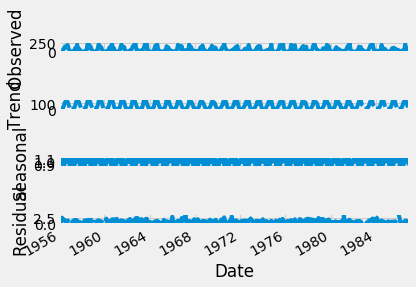

<Figure size 2880x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(new_a2, model='multiplication', freq=10)
result.plot()
pyplot.figure(figsize=(40,30))
pyplot.show()
pyplot.savefig('new1.png')

In [56]:
new_a2

NameError: name 'new_a2' is not defined

In [57]:
print(results)

NameError: name 'results' is not defined

In [58]:
new_a2

NameError: name 'new_a2' is not defined

In [59]:
 new_a2 = new_a2.reset_index()

NameError: name 'new_a2' is not defined

In [60]:
new_a2

NameError: name 'new_a2' is not defined

In [61]:
from sklearn import tree
x = new_a2["Date"]
y = new_a2["Rainfall"]
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf.fit(x, y)

NameError: name 'new_a2' is not defined

In [62]:
from sklearn import tree
x = new_a2["Date"]
y = new_a2["Rainfall"]
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf.fit(x, y)

NameError: name 'new_a2' is not defined

In [63]:
new_a2

NameError: name 'new_a2' is not defined

In [64]:
x = new_a2.index

NameError: name 'new_a2' is not defined

In [65]:
y = new_a2.loc[:, 'Rainfall'].values

NameError: name 'new_a2' is not defined

In [ ]:
print(y)

In [ ]:
y.shape

In [ ]:
x.shape


In [ ]:
newa2 = new_a2.reset_index()

In [ ]:
newa2

In [ ]:
X = newa2.iloc[:,0].values.reshape(-1, 1)

In [ ]:
Y = newa2.iloc[:, 1].values.reshape(-1, 1)

In [ ]:
linear_regressor = LinearRegression()

In [ ]:
Z = range(1956, 1987)

In [ ]:
Z

In [ ]:
linear_regressor.fit(X,Z)

In [ ]:
Z = []
for i in range(1956, 1987):
    Z.append(i)

In [ ]:
Z = np.array(Z)

In [ ]:
Z.reshape(-1, 1)

In [ ]:
Y.shape

In [ ]:
linear_regressor.fit(Z, Y)

In [ ]:
rf_data2

In [ ]:
andhra1 = rf_data2[rf_data2.State == "ANDHRA_PRADESH"]

In [ ]:
andhra1

In [ ]:
X = andhra1.iloc[:,1].values.reshape(-1, 1)

In [ ]:
Y = andhra1.iloc[:,3].values.reshape(-1, 1)

In [ ]:
Y.shape

In [ ]:
linear_regressor.fit(X, Y)

In [ ]:
pred = linear_regressor.predict(X)

In [ ]:
pred

In [ ]:
plt.scatter(X,Y)
plt.plot(X, pred, color="red")
plt.show()

In [ ]:
linear_regressor.score(X, Y)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ...
result = seasonal_decompose(new_a2, model='additive')
result.plot()
pyplot.show()